<a href="https://colab.research.google.com/github/Nithishkumar1602/Scene_understanding/blob/main/Scene_Understanding_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from kaggle.api.kaggle_api_extended import KaggleApi

# Set your Kaggle username and API key as environment variables
import os
os.environ['KAGGLE_USERNAME'] = 'nithishkumar88'
os.environ['KAGGLE_KEY'] = '0fe6f913143e13321009cce167f41f73'

# Authenticate with the Kaggle API
api = KaggleApi()                                                         
api.authenticate()


In [ ]:
!kaggle datasets download -d pranavks55/flickr8k

100% 1.07G/1.07G [00:41<00:00, 32.6MB/s]
100% 1.07G/1.07G [00:41<00:00, 27.8MB/s]


In [ ]:
!unzip '*.zip' -d /content/flickr8k

Streaming output truncated to the last 5000 lines.
  inflating: /content/flickr8k/145129_343604_upload_Flickr_Data/Flickr_Data/Images/2844963839_ff09cdb81f.jpg  
  inflating: /content/flickr8k/145129_343604_upload_Flickr_Data/Flickr_Data/Images/2845246160_d0d1bbd6f0.jpg  
  inflating: /content/flickr8k/145129_343604_upload_Flickr_Data/Flickr_Data/Images/2845691057_d4ab89d889.jpg  
  inflating: /content/flickr8k/145129_343604_upload_Flickr_Data/Flickr_Data/Images/2845845721_d0bc113ff7.jpg  
  inflating: /content/flickr8k/145129_343604_upload_Flickr_Data/Flickr_Data/Images/2846037553_1a1de50709.jpg  
  inflating: /content/flickr8k/145129_343604_upload_Flickr_Data/Flickr_Data/Images/2846785268_904c5fcf9f.jpg  
  inflating: /content/flickr8k/145129_343604_upload_Flickr_Data/Flickr_Data/Images/2846843520_b0e6211478.jpg  
  inflating: /content/flickr8k/145129_343604_upload_Flickr_Data/Flickr_Data/Images/2847514745_9a35493023.jpg  
  inflating: /content/flickr8k/145129_343604_upload_Flickr_Da

In [ ]:
!ls

flickr8k  flickr8k.zip	sample_data


In [ ]:
from glob import glob

images_path = '/content/flickr8k/145129_343604_upload_Flickr_Data/Flickr_Data/Images/'
images = glob(images_path + '*.jpg')
len(images)


8091

In [ ]:
images[:5]

['/content/flickr8k/145129_343604_upload_Flickr_Data/Flickr_Data/Images/3449846784_278bc1ba92.jpg',
 '/content/flickr8k/145129_343604_upload_Flickr_Data/Flickr_Data/Images/493507605_48fe8e3739.jpg',
 '/content/flickr8k/145129_343604_upload_Flickr_Data/Flickr_Data/Images/3628994466_a12065d29b.jpg',
 '/content/flickr8k/145129_343604_upload_Flickr_Data/Flickr_Data/Images/2003663004_5b70920a98.jpg',
 '/content/flickr8k/145129_343604_upload_Flickr_Data/Flickr_Data/Images/3558370311_5734a15890.jpg']

In [ ]:
import cv2
import matplotlib.pyplot as plt

for i in range(5):
    plt.figure()
    img = cv2.imread(images[i])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)

In [ ]:
from keras.applications import ResNet50

incept_model = ResNet50(include_top=True)

In [ ]:
from keras.models import Model
last = incept_model.layers[-2].output
modele = Model(inputs = incept_model.input,outputs = last)
modele.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

In [ ]:
images_features = {}
count = 0
for i in images:
    img = cv2.imread(i)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (224,224))
    
    img = img.reshape(1,224,224,3)
    pred = modele.predict(img).reshape(2048,)
        
    img_name = i.split('/')[-1]
    
    images_features[img_name] = pred
    
    count += 1
    
    if count > 7000:
        break
        
    elif count % 90 == 0:
        print(count)
    

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 29ms/step
2070
1/1 [==============================] - 0s 22ms/step
2160
1/1 [==============================] - 0s 27ms/step
2250
1/1 [==============================] - 0s 34ms/step
2340
1/1 [==============================] - 0s 28ms/step
2430
1/1 [==============================] - 0s 26ms/step
2520
1/1 [==============================] - 0s 21ms/step
2610
1/1 [==============================] - 0s 21ms/step
2700
1/1 [==============================] - 0s 46ms/step
2790
1/1 [==============================] - 0s 21ms/step
2880
1/1 [==============================] - 0s 27ms/step
2970
1/1 [==============================] - 0s 36ms/step
3060
1/1 [==============================] - 0s 23ms/step
3150
1/1 [==============================] - 0s 22ms/step
3240
1/1 [==============================] - 0s 25ms/step
3330
1/1 [==============================] - 0s 23ms/step
3420
1/1 [==============================] 

In [ ]:
len(images_features)

7001

In [ ]:
caption_path = '/content/flickr8k/145129_343604_upload_Flickr_Data/Flickr_Data/Flickr_TextData/Flickr8k.token.txt'

In [ ]:
captions = open(caption_path, 'rb').read().decode('utf-8').split('\n')

In [ ]:
len(captions)

40461

In [ ]:
captions_dict = {}
for i in captions:
    try:
        img_name = i.split('\t')[0][:-2] 
        caption = i.split('\t')[1]
        if img_name in images_features:
            if img_name not in captions_dict:
                captions_dict[img_name] = [caption]
                
            else:
                captions_dict[img_name].append(caption)
            
    except:
        pass

In [ ]:
len(captions_dict)

7001

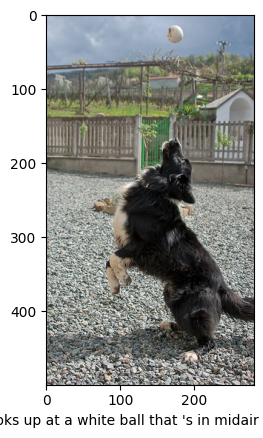

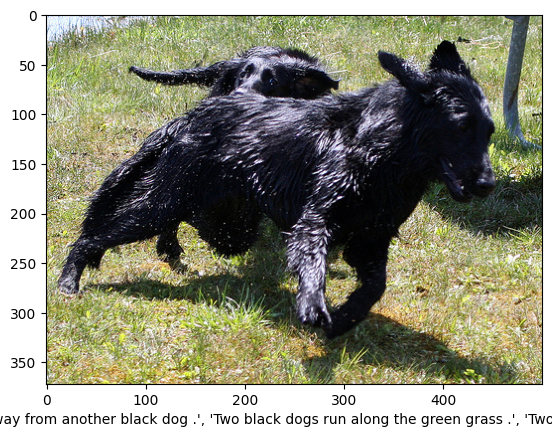

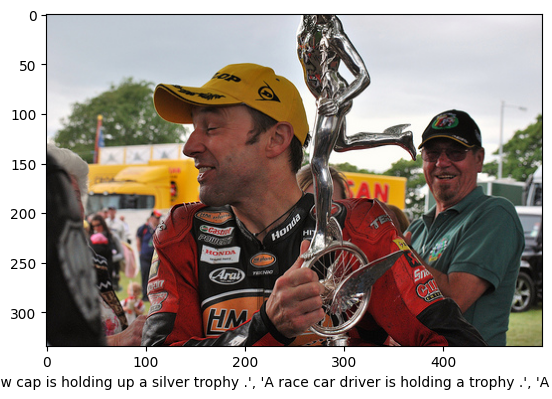

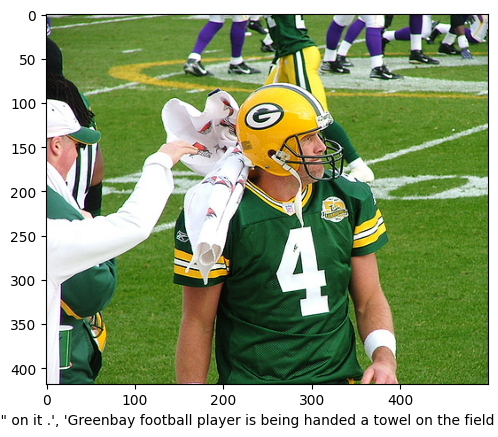

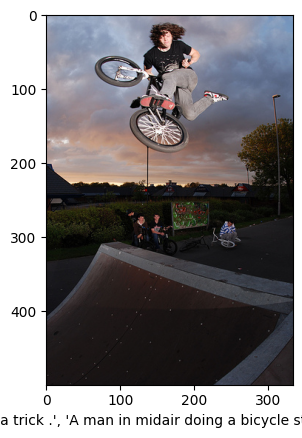

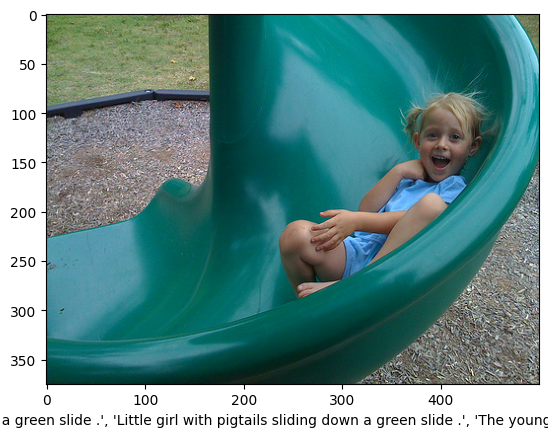

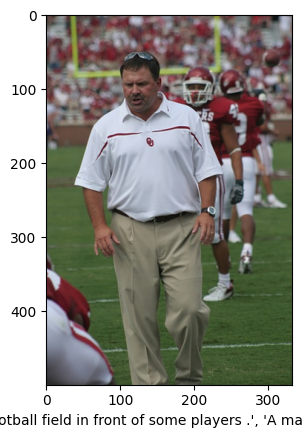

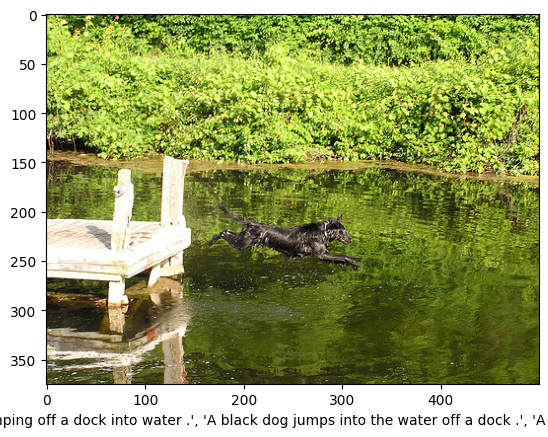

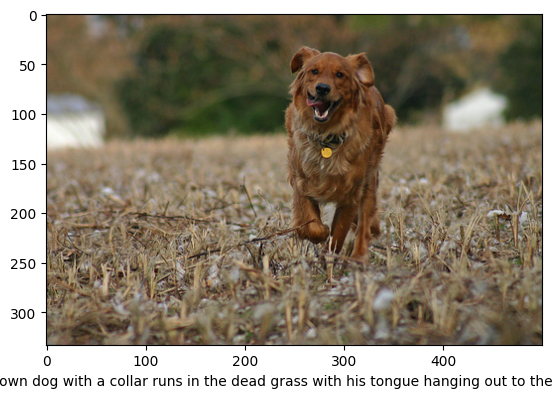

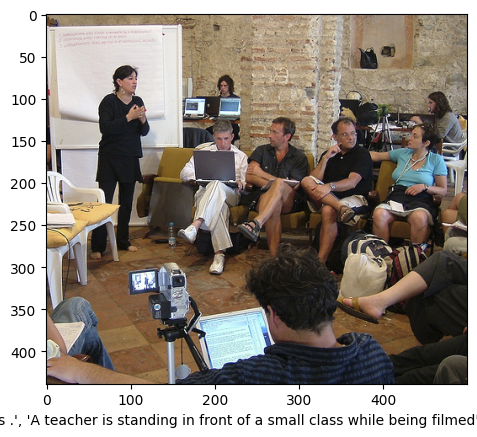

In [ ]:
import matplotlib.pyplot as plt

for i in range(10):
    plt.figure()
    img_name = images[i]
    
    
    img = cv2.imread(img_name)
    
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.xlabel(captions_dict[img_name.split('/')[-1]])
    plt.imshow(img)

In [ ]:
for k in images_features.keys():
    plt.figure(figsize=(8, 6))  # Set the size of the figure
    
    img_name = '/content/flickr8k/145129_343604_upload_Flickr_Data/Flickr_Data/Images/' + k
    
    img = cv2.imread(img_name)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    plt.xlabel(captions_dict[img_name.split('/')[-1]])
    plt.imshow(img, aspect='auto')  # Set the aspect ratio to 'auto' to fit the image
    
    break


In [ ]:
def preprocessed(txt):
    modified = txt.lower()
    modified = 'startofseq ' + modified + ' endofseq'
    return modified
    

In [ ]:
for k,v in captions_dict.items():
    for vv in v:
        captions_dict[k][v.index(vv)] = preprocessed(vv)

In [ ]:
count_words = {}
for k,vv in captions_dict.items():
    for v in vv:
        for word in v.split():
            if word not in count_words:

                count_words[word] = 0

            else:
                count_words[word] += 1

In [ ]:
len(count_words)

8331

In [ ]:
THRESH = -1
count = 1
new_dict = {}
for k,v in count_words.items():
    if count_words[k] > THRESH:
        new_dict[k] = count
        count += 1

In [ ]:
len(new_dict)

8331

In [ ]:
new_dict['<OUT>'] = len(new_dict) 

In [ ]:
captions_backup = captions_dict.copy()

In [ ]:
captions_dict = captions_backup.copy()

In [ ]:
for k, vv in captions_dict.items():
    for v in vv:
        encoded = []
        for word in v.split():  
            if word not in new_dict:
                encoded.append(new_dict['<OUT>'])
            else:
                encoded.append(new_dict[word])


        captions_dict[k][vv.index(v)] = encoded

In [ ]:
captions_dict

{'1000268201_693b08cb0e.jpg': [[1,
   2,
   3,
   4,
   2,
   5,
   6,
   7,
   8,
   9,
   2,
   10,
   11,
   12,
   4,
   13,
   14,
   15,
   16,
   17],
  [1, 2, 18, 19, 20, 2, 21, 22, 16, 17],
  [1, 2, 23, 18, 8, 20, 2, 21, 24, 16, 17],
  [1, 2, 23, 18, 8, 25, 12, 26, 27, 24, 16, 17],
  [1, 2, 23, 18, 4, 2, 5, 6, 19, 20, 2, 21, 28, 16, 17]],
 '1001773457_577c3a7d70.jpg': [[1, 2, 29, 30, 31, 2, 32, 30, 33, 34, 17],
  [1, 2, 29, 30, 31, 2, 35, 30, 36, 37, 38, 39, 40, 25, 41, 16, 17],
  [1,
   2,
   29,
   30,
   31,
   2,
   42,
   30,
   37,
   43,
   44,
   33,
   45,
   46,
   38,
   39,
   4,
   25,
   47,
   16,
   17],
  [1, 48, 49, 11, 50, 51, 52, 46, 38, 39, 40, 25, 41, 16, 17],
  [1, 48, 49, 40, 53, 54, 55, 38, 39, 16, 17]],
 '1002674143_1b742ab4b8.jpg': [[1,
   2,
   23,
   18,
   56,
   4,
   57,
   58,
   4,
   59,
   11,
   2,
   60,
   61,
   37,
   27,
   62,
   4,
   2,
   63,
   16,
   17],
  [1, 2, 23, 18, 7, 64, 4, 59, 11, 2, 65, 60, 61, 16, 17],
  [1,
   2,
   6

In [ ]:
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
MAX_LEN = 0
for k, vv in captions_dict.items():
    for v in vv:
        if len(v) > MAX_LEN:
            MAX_LEN = len(v)
            print(v)

[1, 2, 3, 4, 2, 5, 6, 7, 8, 9, 2, 10, 11, 12, 4, 13, 14, 15, 16, 17]
[1, 2, 29, 30, 31, 2, 42, 30, 37, 43, 44, 33, 45, 46, 38, 39, 4, 25, 47, 16, 17]
[1, 2, 23, 18, 56, 4, 57, 58, 4, 59, 11, 2, 60, 61, 37, 27, 62, 4, 2, 63, 16, 17]
[1, 2, 66, 18, 4, 25, 67, 68, 37, 69, 4, 59, 11, 2, 42, 70, 37, 2, 61, 40, 71, 16, 17]
[1, 2, 236, 31, 13, 237, 126, 238, 239, 82, 25, 240, 126, 64, 88, 26, 2, 241, 37, 2, 121, 82, 242, 16, 17]
[1, 2, 77, 7, 93, 25, 233, 11, 2, 223, 9, 26, 81, 212, 4, 59, 11, 367, 314, 80, 179, 77, 183, 40, 16, 17]
[1, 25, 18, 4, 25, 609, 552, 610, 7, 136, 88, 26, 48, 75, 191, 611, 138, 7, 103, 2, 29, 612, 31, 25, 39, 7, 613, 614, 16, 17]
[1, 72, 33, 326, 75, 191, 126, 138, 524, 825, 93, 2, 826, 827, 126, 138, 37, 124, 828, 810, 31, 829, 4, 27, 212, 126, 31, 138, 37, 830, 443, 16, 17]
[1, 2, 18, 4, 2, 127, 31, 29, 1363, 37, 42, 1154, 7, 136, 88, 26, 2, 77, 4, 2, 816, 31, 2, 18, 4, 2, 509, 5, 31, 29, 31, 42, 1364, 612, 16, 17]
[1, 2, 524, 825, 223, 103, 2, 43, 273, 31, 2150, 

In [ ]:
MAX_LEN

40

In [ ]:
captions_dict

{'1000268201_693b08cb0e.jpg': [[1,
   2,
   3,
   4,
   2,
   5,
   6,
   7,
   8,
   9,
   2,
   10,
   11,
   12,
   4,
   13,
   14,
   15,
   16,
   17],
  [1, 2, 18, 19, 20, 2, 21, 22, 16, 17],
  [1, 2, 23, 18, 8, 20, 2, 21, 24, 16, 17],
  [1, 2, 23, 18, 8, 25, 12, 26, 27, 24, 16, 17],
  [1, 2, 23, 18, 4, 2, 5, 6, 19, 20, 2, 21, 28, 16, 17]],
 '1001773457_577c3a7d70.jpg': [[1, 2, 29, 30, 31, 2, 32, 30, 33, 34, 17],
  [1, 2, 29, 30, 31, 2, 35, 30, 36, 37, 38, 39, 40, 25, 41, 16, 17],
  [1,
   2,
   29,
   30,
   31,
   2,
   42,
   30,
   37,
   43,
   44,
   33,
   45,
   46,
   38,
   39,
   4,
   25,
   47,
   16,
   17],
  [1, 48, 49, 11, 50, 51, 52, 46, 38, 39, 40, 25, 41, 16, 17],
  [1, 48, 49, 40, 53, 54, 55, 38, 39, 16, 17]],
 '1002674143_1b742ab4b8.jpg': [[1,
   2,
   23,
   18,
   56,
   4,
   57,
   58,
   4,
   59,
   11,
   2,
   60,
   61,
   37,
   27,
   62,
   4,
   2,
   63,
   16,
   17],
  [1, 2, 23, 18, 7, 64, 4, 59, 11, 2, 65, 60, 61, 16, 17],
  [1,
   2,
   6

In [ ]:
Batch_size = 5000
VOCAB_SIZE = len(new_dict)

def generator(photo, caption):
    n_samples = 0
    
    X = []
    y_in = []
    y_out = []
    
    for k, vv in caption.items():
        for v in vv:
            for i in range(1, len(v)):
                X.append(photo[k])

                in_seq= [v[:i]]
                out_seq = v[i]

                in_seq = pad_sequences(in_seq, maxlen=MAX_LEN, padding='post', truncating='post')[0]
                out_seq = to_categorical([out_seq], num_classes=VOCAB_SIZE)[0]

                y_in.append(in_seq)
                y_out.append(out_seq)
            
    return X, y_in, y_out
    
    

In [ ]:
X, y_in, y_out = generator(images_features, captions_dict)

In [ ]:
len(X), len(y_in), len(y_out)

In [ ]:
import numpy as np
X = np.array(X)
y_in = np.array(y_in, dtype='float64')
y_out = np.array(y_out, dtype='float64')

In [ ]:
X.shape, y_in.shape, y_out.shape

In [ ]:
X[1510]

In [ ]:
y_in[2]

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.utils import plot_model
from keras.models import Model, Sequential
from keras.layers import Input
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Embedding
from keras.layers import Dropout
from tensorflow.keras.layers import add
from keras.callbacks import ModelCheckpoint
from keras.layers import Dense, Flatten,Input, Convolution2D, Dropout, LSTM, TimeDistributed, Embedding, Bidirectional, Activation, RepeatVector,Concatenate
from keras.models import Sequential, Model

In [ ]:
embedding_size = 128
max_len = MAX_LEN
vocab_size = len(new_dict)

image_model = Sequential()

image_model.add(Dense(embedding_size, input_shape=(2048,), activation='relu'))
image_model.add(RepeatVector(max_len))

image_model.summary()

language_model = Sequential()

language_model.add(Embedding(input_dim=vocab_size, output_dim=embedding_size, input_length=max_len))
language_model.add(LSTM(256, return_sequences=True))
language_model.add(TimeDistributed(Dense(embedding_size)))

language_model.summary()

conca = Concatenate()([image_model.output, language_model.output])
x = LSTM(128, return_sequences=True)(conca)
x = LSTM(512, return_sequences=False)(x)
x = Dense(vocab_size)(x)
out = Activation('softmax')(x)
model = Model(inputs=[image_model.input, language_model.input], outputs = out)

# model.load_weights("../input/model_weights.h5")
model.compile(loss='categorical_crossentropy', optimizer='RMSprop', metrics=['accuracy'])
model.summary()

In [ ]:
model.fit([X, y_in], y_out, batch_size=512, epochs=100)

In [ ]:
inv_dict = {v:k for k, v in new_dict.items()}

In [ ]:
model.save('model.h5')

In [ ]:
model.save_weights('mine_model_weights.h5')

In [ ]:
np.save('vocab.npy', new_dict)

In [ ]:
def getImage(x):
    
    test_img_path = images[x]

    test_img = cv2.imread(test_img_path)
    test_img = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)

    test_img = cv2.resize(test_img, (299,299))

    test_img = np.reshape(test_img, (1,299,299,3))
    
    return test_img

In [ ]:
for i in range(5):
    
    no = np.random.randint(1500,7000,(1,1))[0,0]
    test_feature = modele.predict(getImage(no)).reshape(1,2048)
    
    test_img_path = images[no]
    test_img = cv2.imread(test_img_path)
    test_img = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)


    text_inp = ['startofseq']

    count = 0
    caption = ''
    while count < 25:
        count += 1

        encoded = []
        for i in text_inp:
            encoded.append(new_dict[i])

        encoded = [encoded]

        encoded = pad_sequences(encoded, padding='post', truncating='post', maxlen=MAX_LEN)


        prediction = np.argmax(model.predict([test_feature, encoded]))

        sampled_word = inv_dict[prediction]

        caption = caption + ' ' + sampled_word
            
        if sampled_word == 'endofseq':
            break

        text_inp.append(sampled_word)
        
    plt.figure()
    plt.imshow(test_img)
    plt.xlabel(caption)